In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("01_bbdd_think_tanks_no_stopwords.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17432 entries, 205 to 31640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    17432 non-null  int64         
 1   Think Tank            17432 non-null  object        
 2   Tipo de Think Tank    17432 non-null  object        
 3   Orientación Política  17432 non-null  object        
 4   Autor                 8390 non-null   object        
 5   Título                17425 non-null  object        
 6   Medio                 2498 non-null   object        
 7   Corpus                16690 non-null  object        
 8   Producto              10353 non-null  object        
 9   Enlace                17432 non-null  object        
 10  CorpusPDF             237 non-null    object        
 11  FechaPublicacion      17432 non-null  datetime64[ns]
 12  Año                   17432 non-null  float64       
 13  Mes                

In [4]:
producto_counts = df['Producto'].value_counts()
print(producto_counts)

Producto
Noticias                                                                                                                  4810
Opinión                                                                                                                   1426
Democracia y Anticorrupción                                                                                                711
COLUMNAS                                                                                                                   335
NOTICIAS                                                                                                                   261
                                                                                                                          ... 
['Actualidad', 'Destacados', 'Dilogo Pblico Privado', 'Noticias', 'Polticas Pblicas y Dilogo Social']                        1
['Destacados', 'Noticias', 'Noticias CED', 'Polticas Pblicas y Dilogo Social']                        

In [5]:
productos_unicos = df['Producto'].unique()
print(productos_unicos)

['Noticias' 'Opinión' 'Videos' 'Podcast' 'Seminarios' 'Encuestas'
 'Congreso' None 'PRENSA' 'COLUMNAS' 'NOTICIAS' 'ENTRADA'
 'NUEVA CONSTITUCIÓN' 'EVENTOS' 'AGENDA' 'DOCUMENTOS DE TRABAJO'
 'ACTIVIDADES' 'MÍNIMOS COMUNES' 'OPINIÓN' 'CAMBIO CLIMATICO'
 'ESTUDIO CHILE21' 'PUNTOS CRITICOS' 'REVISTA CONTRASTE'
 'Democracia y Anticorrupción' 'Sustentabilidad y Recursos Naturales.'
 'Jóvenes, Educación y Empleo' 'Opinión Pública'
 'Informe regional ReAL: «Pandemia, anticorrupción y oportunidades de transparencia en América Latina», [...]'
 'Diversidad, Inclusión y Derechos Humanos'
 'Democracia y Anticorrupción, Opinión Pública'
 'Seguridad Social (Salud y Pensiones)'
 'Innovación y Tecnologías de la Información (TIC)'
 'Diversidad, Inclusión y Derechos Humanos, Opinión Pública'
 'Ciudad y Territorio' 'Crecimiento Sustentable e Inclusivo'
 'Seguridad Social'
 'Crecimiento Sustentable e Inclusivo, Democracia y Anticorrupción'
 'Seguridad Social, Seguridad Social (Salud y Pensiones)'
 'Opinión

In [15]:
# Filtrar el DataFrame por el rango de fechas
start_date = "2019-01-01"
end_date = "2023-12-30"
df = df[(df['FechaPublicacion'] >= start_date) & (df['FechaPublicacion'] <= end_date)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 205 to 31640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    17418 non-null  int64         
 1   Think Tank            17418 non-null  object        
 2   Tipo de Think Tank    17418 non-null  object        
 3   Orientación Política  17418 non-null  object        
 4   Autor                 8386 non-null   object        
 5   Título                17411 non-null  object        
 6   Medio                 2495 non-null   object        
 7   Corpus                16676 non-null  object        
 8   Producto              10352 non-null  object        
 9   Enlace                17418 non-null  object        
 10  CorpusPDF             237 non-null    object        
 11  FechaPublicacion      17418 non-null  datetime64[ns]
 12  Año                   17418 non-null  float64       
 13  Mes                

In [16]:
df['Think Tank'].value_counts()

Think Tank
Signos Uandes             3612
LyD                       2622
FPP                       2585
CEP                       1998
Espacio Público           1525
Instituto Igualdad         892
Fundación Jaime Guzmán     678
Instituto Res Pública      575
Fundación Sol              550
Pivotes                    412
Nodo XXI                   328
Chile 21                   288
CED                        265
Casa Común                 227
CLAPES UC                  205
CDC                        171
Horizonte Ciudadano        130
Instituto Libertad         124
Horizontal                 116
OPES                        45
ICAL                        38
IES                         20
Ideas Republicanas           9
Idea País                    3
Name: count, dtype: int64

C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\1506820404.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nodo_xxi_time_series = nodo_xxi_data.resample('M', on='FechaPublicacion').size()


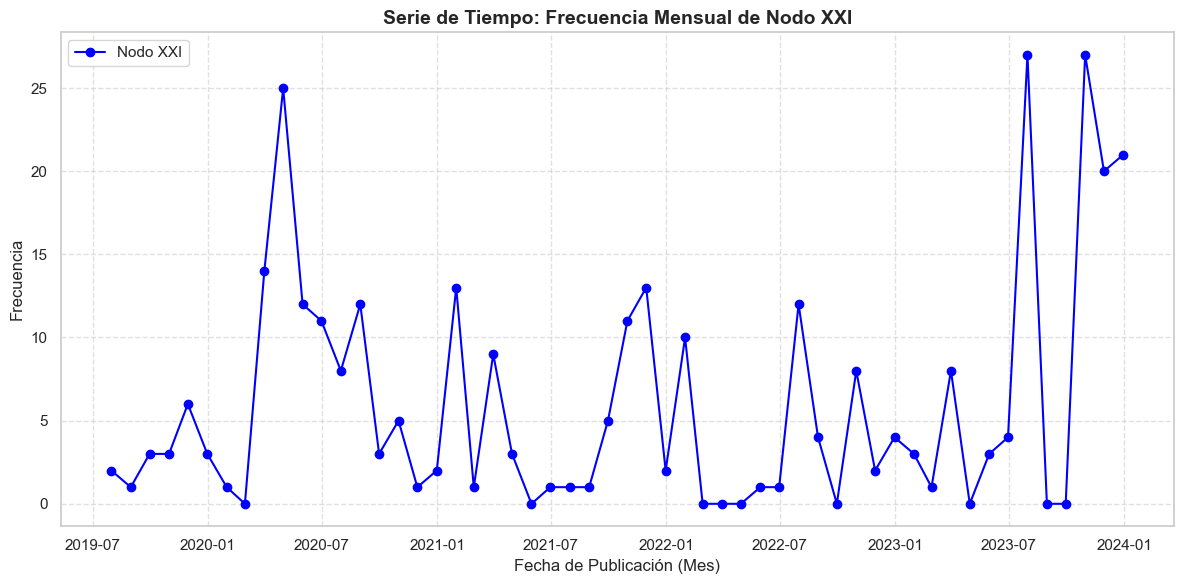

In [30]:
# Filtrar el DataFrame para el Think Tank 'Nodo XXI'
nodo_xxi_data = df[df['Think Tank'] == 'Nodo XXI']

# Crear la serie de tiempo resampleada por mes
nodo_xxi_time_series = nodo_xxi_data.resample('M', on='FechaPublicacion').size()

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(nodo_xxi_time_series.index, nodo_xxi_time_series.values, marker='o', color='blue', label='Nodo XXI')
plt.title('Serie de Tiempo: Frecuencia Mensual de Nodo XXI', fontsize=14, fontweight='bold')
plt.xlabel('Fecha de Publicación (Mes)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17418 entries, 205 to 31640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    17418 non-null  int64         
 1   Think Tank            17418 non-null  object        
 2   Tipo de Think Tank    17418 non-null  object        
 3   Orientación Política  17418 non-null  object        
 4   Autor                 8386 non-null   object        
 5   Título                17411 non-null  object        
 6   Medio                 2495 non-null   object        
 7   Corpus                16676 non-null  object        
 8   Producto              10352 non-null  object        
 9   Enlace                17418 non-null  object        
 10  CorpusPDF             237 non-null    object        
 11  FechaPublicacion      17418 non-null  datetime64[ns]
 12  Año                   17418 non-null  float64       
 13  Mes                

In [32]:
tipo_think_tank_counts = df['Tipo de Think Tank'].value_counts()
orientacion_politica_counts = df['Orientación Política'].value_counts()

print("Value counts de 'Tipo de Think Tank':")
print(tipo_think_tank_counts)

print("\nValue counts de 'Orientación Política':")
print(orientacion_politica_counts)

Value counts de 'Tipo de Think Tank':
Tipo de Think Tank
Transversal      11301
Universidades     3817
De partido        2073
Semi Difuntos      227
Name: count, dtype: int64

Value counts de 'Orientación Política':
Orientación Política
Derecha      12959
Izquierda     4459
Name: count, dtype: int64


In [34]:
# Agrupar por 'Tipo de Think Tank' y 'Orientación Política' y obtener los value_counts de 'Think Tank'
segmented_counts = df.groupby(['Tipo de Think Tank',])['Think Tank'].value_counts()

# Mostrar los resultados
print(segmented_counts)

Tipo de Think Tank  Think Tank            
De partido          Instituto Igualdad         892
                    Fundación Jaime Guzmán     678
                    CDC                        171
                    Instituto Libertad         124
                    Horizontal                 116
                    OPES                        45
                    ICAL                        38
                    Ideas Republicanas           9
Semi Difuntos       Casa Común                 227
Transversal         LyD                       2622
                    FPP                       2585
                    CEP                       1998
                    Espacio Público           1525
                    Instituto Res Pública      575
                    Fundación Sol              550
                    Pivotes                    412
                    Nodo XXI                   328
                    Chile 21                   288
                    CED                

In [35]:
# Agrupar por 'Tipo de Think Tank' y 'Orientación Política' y obtener los value_counts de 'Think Tank'
segmented_counts = df.groupby(['Orientación Política',])['Think Tank'].value_counts()

# Mostrar los resultados
print(segmented_counts)

Orientación Política  Think Tank            
Derecha               Signos Uandes             3612
                      LyD                       2622
                      FPP                       2585
                      CEP                       1998
                      Fundación Jaime Guzmán     678
                      Instituto Res Pública      575
                      Pivotes                    412
                      CLAPES UC                  205
                      Instituto Libertad         124
                      Horizontal                 116
                      IES                         20
                      Ideas Republicanas           9
                      Idea País                    3
Izquierda             Espacio Público           1525
                      Instituto Igualdad         892
                      Fundación Sol              550
                      Nodo XXI                   328
                      Chile 21                   288
 

### Checklist para buscar imágenes de Think Tanks

- [X] **Signos Uandes**
- [X] **LyD** (Libertad y Desarrollo)
- [ ] **FPP** (Fundación para el Progreso)
- [ ] **CEP** (Centro de Estudios Públicos)
- [ ] **Espacio Público**
- [ ] **Instituto Igualdad**
- [ ] **Fundación Jaime Guzmán**
- [ ] **Instituto Res Pública**
- [ ] **Fundación Sol**
- [ ] **Pivotes**
- [ ] **Nodo XXI**
- [ ] **Chile 21**
- [ ] **CED**
- [ ] **Casa Común**
- [ ] **CLAPES UC** (Centro Latinoamericano de Políticas Económicas y Sociales)
- [ ] **CDC** (Centro Democracia y Comunidad)
- [ ] **Horizonte Ciudadano**
- [ ] **Instituto Libertad**
- [ ] **Horizontal**
- [ ] **OPES**
- [ ] **ICAL**
- [ ] **IES**
- [ ] **Ideas Republicanas**
- [ ] **Idea País**


In [ ]:
# Agrupar por 'Think Tank' y resamplear por mes
think_tank_groups = df.groupby('Think Tank')

# Iterar sobre cada grupo y generar la tabla
for think_tank, group in think_tank_groups:
    resampled_data = group.resample('M', on='FechaPublicacion').size()
    total_n = resampled_data.sum()  # Calcular el total N para toda la serie de tiempo
    print(f"Think Tank: {think_tank} (N total: {total_n})")
    for date, value in resampled_data.items():
        print(f"Fecha: {date.strftime('%Y-%m')}, N: {value}")
    print("\n")

Think Tank: CDC (N total: 171)
Fecha: 2019-01, N: 1
Fecha: 2019-02, N: 0
Fecha: 2019-03, N: 1
Fecha: 2019-04, N: 3
Fecha: 2019-05, N: 1
Fecha: 2019-06, N: 0
Fecha: 2019-07, N: 1
Fecha: 2019-08, N: 0
Fecha: 2019-09, N: 0
Fecha: 2019-10, N: 1
Fecha: 2019-11, N: 0
Fecha: 2019-12, N: 1
Fecha: 2020-01, N: 1
Fecha: 2020-02, N: 0
Fecha: 2020-03, N: 0
Fecha: 2020-04, N: 0
Fecha: 2020-05, N: 0
Fecha: 2020-06, N: 0
Fecha: 2020-07, N: 0
Fecha: 2020-08, N: 0
Fecha: 2020-09, N: 0
Fecha: 2020-10, N: 0
Fecha: 2020-11, N: 0
Fecha: 2020-12, N: 1
Fecha: 2021-01, N: 2
Fecha: 2021-02, N: 0
Fecha: 2021-03, N: 1
Fecha: 2021-04, N: 0
Fecha: 2021-05, N: 1
Fecha: 2021-06, N: 0
Fecha: 2021-07, N: 7
Fecha: 2021-08, N: 15
Fecha: 2021-09, N: 1
Fecha: 2021-10, N: 7
Fecha: 2021-11, N: 9
Fecha: 2021-12, N: 18
Fecha: 2022-01, N: 8
Fecha: 2022-02, N: 5
Fecha: 2022-03, N: 9
Fecha: 2022-04, N: 9
Fecha: 2022-05, N: 5
Fecha: 2022-06, N: 2
Fecha: 2022-07, N: 7
Fecha: 2022-08, N: 4
Fecha: 2022-09, N: 10
Fecha: 2022-10, N: 10

C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\3723323782.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = group.resample('M', on='FechaPublicacion').size()
C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\3723323782.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = group.resample('M', on='FechaPublicacion').size()
C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\3723323782.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = group.resample('M', on='FechaPublicacion').size()
C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\3723323782.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = group.resample('M', on='FechaPublicacion').size()
C:\Users\rodri\AppData\Local\Temp\ipykernel_25828\3723323782

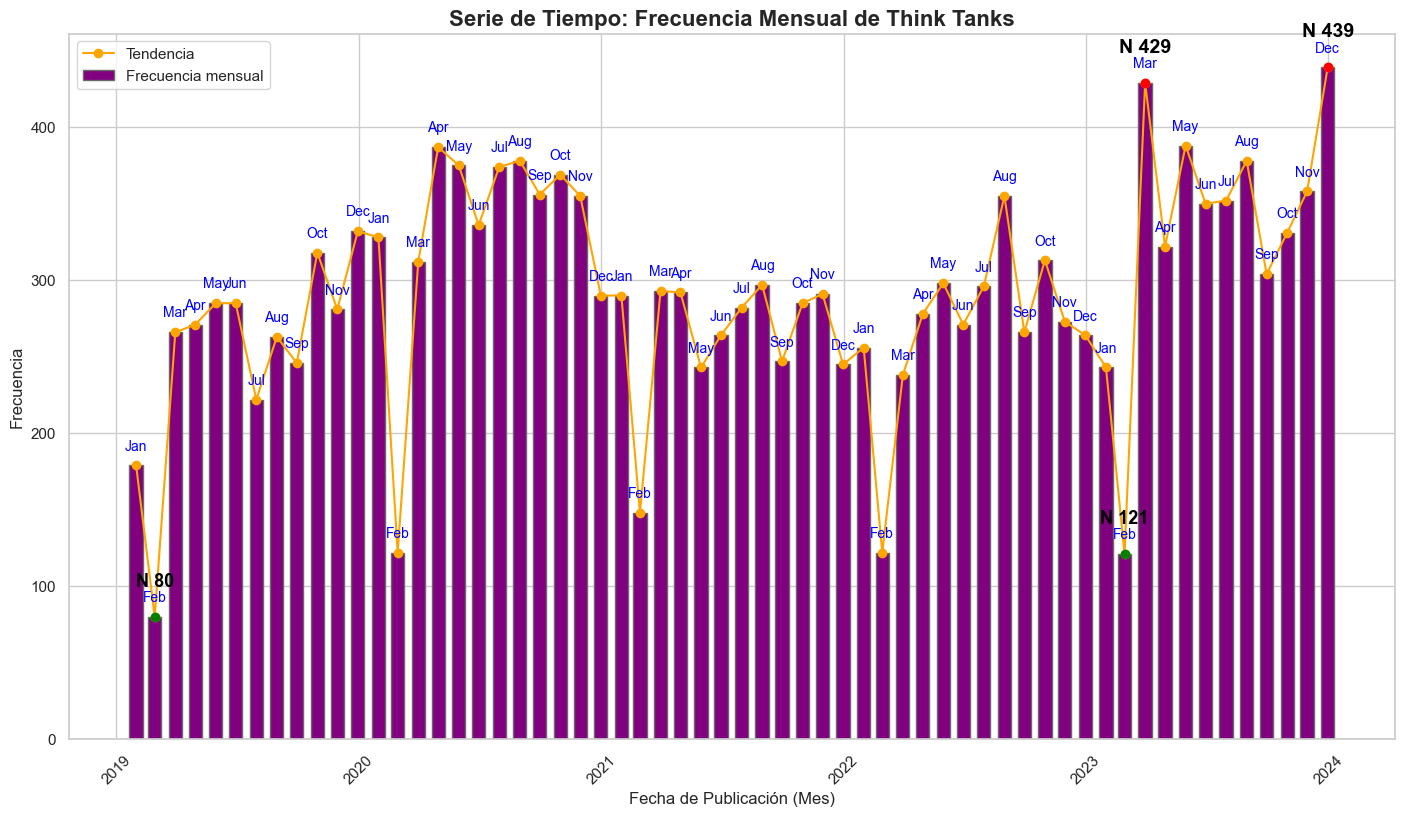

In [26]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar el histograma con barras más gruesas, rellenas de negro y contorno gris
bars = ax.bar(
    hist_data_resampled.index, 
    hist_data_resampled.values, 
    width=20,  # Aumentar el grosor de las barras
    color='purple', 
    edgecolor='dimgray', 
    label='Frecuencia mensual'
)

# Graficar la línea con puntos
ax.plot(hist_data_resampled.index, hist_data_resampled.values, color='orange', marker='o', label='Tendencia')

# Añadir el nombre del mes correspondiente a cada barra
for idx, value in hist_data_resampled.items():
    month_name = idx.strftime('%b')  # Obtener el nombre del mes
    ax.text(idx, value + 10, month_name, color='blue', ha='center', fontsize=10)

# Identificar los top 2 máximos y mínimos
top_max = hist_data_resampled.nlargest(2)
top_min = hist_data_resampled.nsmallest(2)

# Añadir indicadores para los top 2 máximos
for idx, value in top_max.items():
    ax.text(idx, value + 20, f'N {value}', color='black', ha='center', fontsize=14, fontweight='bold')
    ax.scatter(idx, value, color='red', zorder=5)

# Añadir indicadores para los top 2 mínimos
for idx, value in top_min.items():
    ax.text(idx, value + 20, f'N {value}', color='black', ha='center', fontsize=13, fontweight='bold')
    ax.scatter(idx, value, color='green', zorder=5)

# Ajustar el diseño para evitar superposiciones
plt.xticks(rotation=45)
plt.tight_layout()

# Añadir títulos y etiquetas
ax.set_title('Serie de Tiempo: Frecuencia Mensual de Think Tanks', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha de Publicación (Mes)', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [27]:
for date, value in hist_data_resampled.items():
    print(f"Fecha: {date.strftime('%Y-%m')}, N: {value}")

Fecha: 2019-01, N: 179
Fecha: 2019-02, N: 80
Fecha: 2019-03, N: 266
Fecha: 2019-04, N: 271
Fecha: 2019-05, N: 285
Fecha: 2019-06, N: 285
Fecha: 2019-07, N: 222
Fecha: 2019-08, N: 263
Fecha: 2019-09, N: 246
Fecha: 2019-10, N: 318
Fecha: 2019-11, N: 281
Fecha: 2019-12, N: 332
Fecha: 2020-01, N: 328
Fecha: 2020-02, N: 122
Fecha: 2020-03, N: 312
Fecha: 2020-04, N: 387
Fecha: 2020-05, N: 375
Fecha: 2020-06, N: 336
Fecha: 2020-07, N: 374
Fecha: 2020-08, N: 378
Fecha: 2020-09, N: 356
Fecha: 2020-10, N: 369
Fecha: 2020-11, N: 355
Fecha: 2020-12, N: 290
Fecha: 2021-01, N: 290
Fecha: 2021-02, N: 148
Fecha: 2021-03, N: 293
Fecha: 2021-04, N: 292
Fecha: 2021-05, N: 243
Fecha: 2021-06, N: 264
Fecha: 2021-07, N: 282
Fecha: 2021-08, N: 297
Fecha: 2021-09, N: 247
Fecha: 2021-10, N: 285
Fecha: 2021-11, N: 291
Fecha: 2021-12, N: 245
Fecha: 2022-01, N: 256
Fecha: 2022-02, N: 122
Fecha: 2022-03, N: 238
Fecha: 2022-04, N: 278
Fecha: 2022-05, N: 298
Fecha: 2022-06, N: 271
Fecha: 2022-07, N: 296
Fecha: 2022-